In [1]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf
import pandas as pd


In [2]:

# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
Egroup=dat[dat['Region']=='E']
Egroup

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10
8,10,E,Aube,19602,4086,59,3608,18642,10989,2:Med,...,77,54,9,28,86,15,207,83.244,6004,246.36
18,21,E,Cote-d'Or,32256,9159,60,2540,15599,16128,2:Med,...,49,27,18,33,78,13,206,136.109,8763,375.88
22,25,E,Doubs,11560,5914,73,3436,12512,40690,2:Med,...,38,25,6,18,73,2,65,202.065,5234,265.54
23,26,E,Drome,13396,7759,42,2829,16348,23816,2:Med,...,21,13,62,54,46,38,8,295.543,6530,299.56
35,38,E,Isere,18785,8326,29,4077,12236,36275,2:Med,...,52,27,73,23,26,57,12,268.661,7431,550.26
36,39,E,Jura,26221,8059,73,3012,20384,34476,2:Med,...,84,66,43,39,71,3,32,197.155,4999,312.50
49,52,E,Haute-Marne,26231,9539,72,4013,17507,19586,1:Sm,...,63,55,4,56,65,4,138,129.765,8162,249.83


In [3]:
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


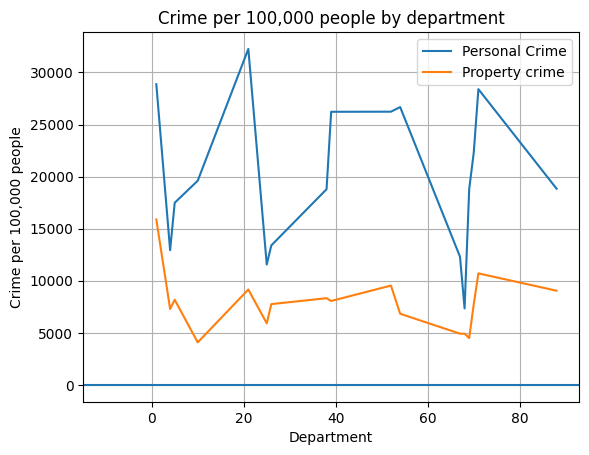

In [18]:
# plt.scatter(Egroup['dept'],Egroup['Crime_pers'])
plt.plot(Egroup['dept'],Egroup['Crime_pers'])
plt.plot(Egroup['dept'],Egroup['Crime_prop'])
plt.xlabel('Department')
plt.ylabel('Crime per 100,000 people')
plt.acorr(Egroup['Crime_pers'])
# plt.bar(Egroup['dept'],Egroup['Crime_pers'])
plt.grid(True)
plt.title('Crime per 100,000 people by department')
# plt.legend(["Personal Crime", "Property crime"], loc="upper left")
plt.legend(["Personal Crime", "Property crime"])
plt.show()

In [19]:
# Load data
dat = pd.read_csv("weather_classification_data_incsv.csv")
# rainy_weather= dat[dat['Weather Type']=='Rainy']
# rainy_weather
dat

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10,74,14.5,71,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1,76,3.5,23,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30,77,5.5,28,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3,76,10.0,94,overcast,984.27,0,Winter,2.0,inland,Snowy


In [24]:
df = dat
df['Season'] = df['Season'].replace({'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4})
df['Cloud Cover'] = df['Cloud Cover'].replace({'partly cloudy': 1, 'clear': 2, 'overcast': 3, 'cloudy': 4})
df['Weather Type'] = df['Weather Type'].replace({'Rainy': 1, 'Cloudy': 2, 'Sunny': 3, 'Snowy': 4})
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_15416\479976994.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Season'] = df['Season'].replace({'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4})
C:\Users\Admin\AppData\Local\Temp\ipykernel_15416\479976994.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Weather Type'] = df['Weather Type'].replace({'Rainy': 1, 'Cloudy': 2, 'Sunny': 3, 'Snowy': 4})


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,column_name
0,14,73,9.5,82,1,1010.82,2,1,3.5,inland,1,1
1,39,96,8.5,71,1,1011.43,7,2,10.0,inland,2,1
2,30,64,7.0,16,2,1018.72,5,2,5.5,mountain,3,2
3,38,83,1.5,82,2,1026.25,7,2,1.0,coastal,3,2
4,27,74,17.0,66,3,990.67,1,1,2.5,mountain,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10,74,14.5,71,3,1003.15,1,3,1.0,mountain,1,3
13196,-1,76,3.5,23,4,1067.23,1,1,6.0,coastal,4,4
13197,30,77,5.5,28,3,1012.69,3,4,9.0,coastal,2,3
13198,3,76,10.0,94,3,984.27,0,1,2.0,inland,4,3


In [25]:
df.drop(columns=['column_name'])

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9.5,82,1,1010.82,2,1,3.5,inland,1
1,39,96,8.5,71,1,1011.43,7,2,10.0,inland,2
2,30,64,7.0,16,2,1018.72,5,2,5.5,mountain,3
3,38,83,1.5,82,2,1026.25,7,2,1.0,coastal,3
4,27,74,17.0,66,3,990.67,1,1,2.5,mountain,1
...,...,...,...,...,...,...,...,...,...,...,...
13195,10,74,14.5,71,3,1003.15,1,3,1.0,mountain,1
13196,-1,76,3.5,23,4,1067.23,1,1,6.0,coastal,4
13197,30,77,5.5,28,3,1012.69,3,4,9.0,coastal,2
13198,3,76,10.0,94,3,984.27,0,1,2.0,inland,4


In [26]:
from sklearn.model_selection import train_test_split

In [69]:
X = df.drop(columns=['Weather Type', 'Location', 'column_name'])
X

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km)
0,14,73,9.5,82,1,1010.82,2,1,3.5
1,39,96,8.5,71,1,1011.43,7,2,10.0
2,30,64,7.0,16,2,1018.72,5,2,5.5
3,38,83,1.5,82,2,1026.25,7,2,1.0
4,27,74,17.0,66,3,990.67,1,1,2.5
...,...,...,...,...,...,...,...,...,...
13195,10,74,14.5,71,3,1003.15,1,3,1.0
13196,-1,76,3.5,23,4,1067.23,1,1,6.0
13197,30,77,5.5,28,3,1012.69,3,4,9.0
13198,3,76,10.0,94,3,984.27,0,1,2.0


In [70]:
y = df.drop(columns=['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility (km)', 'column_name', 'Location'])
y

,Weather Type
0,1
1,2
2,3
3,3
4,1
...,...
13195,1
13196,4
13197,2
13198,4


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9240, 9), (9240, 1), (3960, 9), (3960, 1))

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
model = LogisticRegression()
model.fit(X_train, y_train)
result = model.predict(X_test)
result

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([3, 3, 3, ..., 1, 3, 3], dtype=int64)

In [75]:
from sklearn.metrics import classification_report, accuracy_score

In [76]:
accuracy = accuracy_score(result, y_test)
report = classification_report(y_test, result)
print(accuracy)
print(report)

0.8376262626262626
              precision    recall  f1-score   support

           1       0.82      0.83      0.83       982
           2       0.81      0.79      0.80       955
           3       0.86      0.81      0.83       990
           4       0.86      0.91      0.88      1033

    accuracy                           0.84      3960
   macro avg       0.84      0.84      0.84      3960
weighted avg       0.84      0.84      0.84      3960



In [77]:
testing = model.predict([[37, 70, 10.0, 80, 1, 990.0, 5, 1, 4.0]])
testing

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [78]:
from joblib import dump

dump(model,'weather.joblib')

['weather.joblib']

In [79]:
from joblib import load

In [80]:
model = load('weather.joblib')

testing = model.predict([[37, 70, 10.0, 80, 1, 990.0, 5, 1, 4.0]])
testing

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)